In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

In [2]:

def readData(filepath):
    ds = pd.read_csv(filepath)
    data = ds.values
    xtrain = data[:,0:-1]
    ytrain = data[:,-1]
    return xtrain,ytrain



In [5]:
filepath = './mnist/train.csv'
xtrain,ytrain = readData(filepath)


In [6]:
ytrain[:100]

array([0, 3, 6, 4, 9, 4, 1, 2, 2, 8, 1, 9, 9, 3, 1, 1, 8, 2, 5, 5, 0, 9,
       4, 2, 4, 5, 3, 2, 8, 5, 1, 1, 6, 9, 4, 4, 9, 0, 7, 4, 0, 4, 0, 9,
       1, 8, 9, 0, 3, 5, 2, 8, 4, 9, 7, 1, 8, 6, 4, 9, 1, 5, 1, 1, 7, 6,
       8, 3, 9, 6, 3, 0, 0, 1, 1, 0, 7, 5, 0, 6, 3, 8, 6, 4, 3, 0, 1, 6,
       8, 0, 0, 3, 4, 5, 8, 9, 2, 4, 2, 5], dtype=int64)

4
(19999, 784)


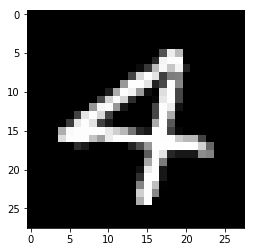

In [7]:
def printImage(i,xtrain,ytrain):
    """Prints the i th row and label from dataset
    Args:
        Accepts an integer i, the row number
    Outputs:
        Image and Label
    """
    image = xtrain[i]
    label = ytrain[i]
    
    print(label)
    img = image.reshape((28,28))
    plt.figure(0)
    plt.imshow(img,cmap='gray')
    
    
printImage(3,xtrain,ytrain)

# Normalize the Data
xtrain = np.asarray(xtrain)
xtrain = (xtrain-xtrain.mean())/xtrain.std()

print(xtrain.shape)

In [8]:

xtrain = np.asarray(xtrain)
print(xtrain.shape)


(19999, 784)


In [3]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        
    def hingeLoss(self,w,b,x,y):
        loss =  0
        loss += 0.5*np.dot(w,w.T)
        m = x.shape[0]
        for i in range(m):
            ti = y[i]*(np.dot(w,x[i].T)+ b)
            loss += self.C*max(0,(1-ti))
        return loss[0][0]
                
    def solve(self,x,y,batch_size=100,solver="Pegasos",learning_rate=0.001):
        if(solver=="Pegasos"):
            no_of_features = x.shape[1]
            no_of_samples = x.shape[0]
            n = learning_rate
            c = self.C
            w = np.zeros((1,no_of_features))
            bias = 0
            losses = []
            # Apply the Gradient Update Rule
            for t in range(300):
                l = self.hingeLoss(w,bias,x,y)
                losses.append(l)  
                indexes = np.arange(no_of_samples)
                np.random.shuffle(indexes)
                print(l)
                for b in range(0,no_of_samples,batch_size): 
                    gradw = 0
                    gradb = 0
                    for j in range(b,b+batch_size):
                        if(j<no_of_samples):
                            i  = indexes[j]
                            ti = y[i]*(np.dot(w,x[i].T)+bias) 
                            if ti>1:
                                gradw += 0
                                gradb += 0
                            else:
                                gradw += c*y[i]*x[i]
                                gradb += c*y[i]
                    w = w - n*w + n*gradw
                    bias = bias + n*gradb
            return w,bias,losses

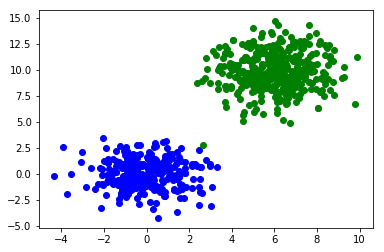

In [4]:
mean = [0, 0]
cov = [[2, 0], [0, 2]]

mean1 = [6, 10]
cov1 = [[2, 0], [0, 3]]
data1 = np.random.multivariate_normal(mean,cov,300)
data2 = np.random.multivariate_normal(mean1,cov1,400)

plt.scatter(data1[:,0],data1[:,1],color='blue')
plt.scatter(data2[:,0],data2[:,1],color='green')

plt.show()


(700, 2)


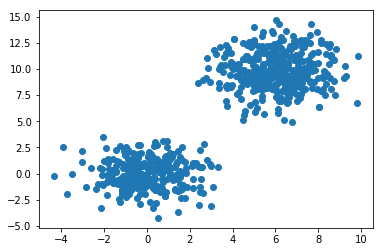

(700,)


In [5]:
data = np.zeros((700,2))
data[:300,:] = data1
data[300:,:] = data2

print(data.shape)
plt.scatter(data[:,0],data[:,1])
plt.show()

labels = np.zeros((700,))
labels[:300] = -1
labels[300:] = 1

print(labels.shape)
 #ti = y[i]*(np.dot(w,x[i].T))

In [6]:
svm = SVM()
w,b,losses = svm.solve(data,labels)
print(w,b)

700.0
248.9933333230373
176.9824575881127
109.85452384247888
58.50093730507935
38.53074768746638
27.228892159977313
21.339645859690922
17.58388212355425
15.179295501586214
13.187211671534346
12.075005064119978
11.269294067300736
10.71119159172501
9.858126320634268
9.239379843617137
8.9977875858749
8.23478286703673
7.747884114543396
7.969808377869082
7.170509378878655
6.764006457457617
6.715546850661001
6.535026779652032
5.928489849668051
5.689629640382348
5.487742120205879
5.361830785689824
5.360877576295705
5.216882277368272
5.034765720234202
5.049364903914238
4.965268869915587
4.9176291078514
4.656270494390689
4.567746646898277
4.500626862150825
4.444685962567056
4.3529223217784505
4.45806864376369
4.265428561588903
4.162215270741108
4.150320047668609
4.111694335937849
4.055431370586282
3.935862633247911
3.939474025152382
3.8613860623857237
3.80729352784431
3.7660194322018805
3.77513730183683
3.686969252533692
3.651145761263642
3.615125058263409
3.59049821304526
3.5215600424913784
3.

In [14]:
from sklearn import svm

In [15]:
cf1 = svm.SVC(kernel='linear')
cf1.fit(data, labels)
w = cf1.coef_
b = cf1.intercept_


print(cf1.classes_)
#print(cf1.score(data,labels))
print(w[0][0])


[-1.  1.]
0.5370073068555222


In [16]:
svm = SVM()
w,b,losses = svm.solve(data,labels)

print(w)

[[700.]]
[[246.76941277]]
[[172.22266569]]
[[101.53245234]]
[[53.80853276]]
[[35.65037027]]
[[26.34460293]]
[[19.53993772]]
[[15.98315651]]
[[14.73787387]]
[[12.40421503]]
[[11.25507892]]
[[10.33842618]]
[[10.3343154]]
[[9.11727391]]
[[8.58209688]]
[[7.93046117]]
[[7.66247299]]
[[7.13856267]]
[[6.74844368]]
[[6.47906511]]
[[6.57921066]]
[[5.92967701]]
[[5.73023254]]
[[5.62745058]]
[[5.4009279]]
[[5.20736461]]
[[4.99525852]]
[[4.80943829]]
[[4.6629636]]
[[4.77388058]]
[[4.41133563]]
[[4.54338465]]
[[4.33221926]]
[[4.38919478]]
[[4.01490065]]
[[4.15263175]]
[[3.867432]]
[[3.80732327]]
[[3.7552755]]
[[3.81815218]]
[[3.61817728]]
[[3.62112983]]
[[3.45828364]]
[[3.56140748]]
[[3.34194068]]
[[3.33536953]]
[[3.21455332]]
[[3.3796913]]
[[3.13444864]]
[[3.33761285]]
[[3.05259569]]
[[3.09184504]]
[[2.98489305]]
[[2.94217288]]
[[3.23309975]]
[[2.901139]]
[[2.88427373]]
[[2.88585427]]
[[2.81812138]]
[[2.80265012]]
[[2.84443981]]
[[2.76260767]]
[[2.74699285]]
[[2.71455983]]
[[2.73972507]]
[[2.68249

[[1.45365218]]
[[1.40902469]]
[[1.39797563]]
[[1.42489398]]
[[1.41323635]]
[[1.40157322]]
[[1.39495397]]
[[1.41683463]]
[[1.40540421]]
[[1.43240019]]
[[1.38851126]]
[[1.39997719]]
[[1.39974919]]
[[1.38826954]]
[[1.41217387]]
[[1.40044583]]
[[1.38961736]]
[[1.4156797]]
[[1.4040952]]
[[1.39268231]]
[[1.39158708]]
[[1.40816484]]
[[1.39667946]]
[[1.42363797]]
[[1.41179999]]
[[1.40011741]]
[[1.38870304]]
[[1.38976297]]
[[1.40406863]]
[[1.39251448]]
[[1.38587848]]
[[1.39379914]]
[[1.39643035]]
[[1.38505672]]
[[1.40899692]]
[[1.4443442]]
[[1.42406575]]
[[1.38451777]]
[[1.39870693]]
[[1.38844453]]
[[1.38939559]]
[[1.40396184]]
[[1.39255345]]
[[1.38527179]]
[[1.40501662]]
[[1.40688896]]
[[1.41958183]]
[[1.40776461]]
[[1.39597677]]
[[1.38657469]]
[[1.39250063]]
[[1.40025994]]
[[1.41196021]]
[[1.38868318]]
[[1.40355419]]
[[1.40429131]]
[[1.4180772]]
[[1.38258289]]
[[1.39739821]]
[[1.38802508]]
[[1.37639884]]
[[1.3849862]]
[[1.39197706]]
[[1.41893196]]
[[1.40740231]]
[[1.3960292]]
[[1.38464429]]
[

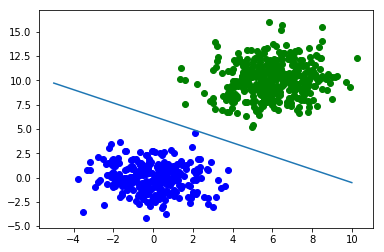

[ 9.72568173  9.18623189  8.64678206  8.10733222  7.56788239  7.02843255
  6.48898272  5.94953288  5.41008305  4.87063321  4.33118338  3.79173354
  3.25228371  2.71283387  2.17338404  1.6339342   1.09448437  0.55503453
  0.01558469 -0.52386514]


In [17]:
xt = np.linspace(-5,10,20)
yt = -1*(w[0,0f]*xt + b)/w[0,1]

plt.scatter(data1[:,0],data1[:,1],color='blue')
plt.scatter(data2[:,0],data2[:,1],color='green')

#plt.scatter(data[:,0],data[:,1])
plt.plot(xt,yt)
plt.show()
print(yt)

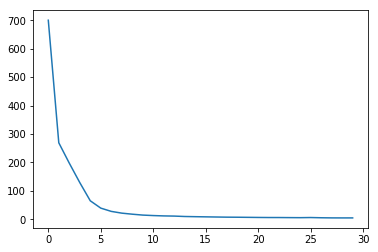

In [37]:
plt.figure(1)
plt.plot(losses[:30])
plt.show()